# やること

# 関数作成
## データセット(X,t)を作る。
## 基底関数$\phi_0,...,\phi_{M-1}$を作る。
e.g. $\phi_0(x)=1, \phi_1(x)=x, \phi_2(x)=x^2,\ldots$
## $\Phi$を計算する
## $w$を計算する

# プロット
1. $(X,t)$ をプロット
2. $(X,Y_{predicted} =w \phi(X))$をプロット

# Cross-Validation

## (X,t)をK分割する。
## それぞれの分割kについて以下をやる。
    ### k番目以外を使って関数を作る。
    ### k番目を使って

3.2乗誤差 $|\omega \phi(x)-t|^2$とRMS(Root mean squre) $\sqrt{ \sum_n |\omega \phi(x_n)-t_n|^2 /N_k}$を計算して評価.

In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

# データセット生成

In [2]:
xy_min = -1
xy_max = 1
n_division = 10#100#10

x = np.linspace(xy_min, xy_max, n_division+1)

#Ｘは(n_division+1)^2個の点の集まり。
#X[0]はx座標の集まり. X[1]はy座標の集まり。
X=np.meshgrid(x,x)
# t=np.sin(X[0])+3*np.cos(X[1])+X[0]*X[1]+np.sin(X[1])**2 *np.cos(X[0])*X[1]**(5)
t=X[0]**6*X[1]**3

num_data=X[0].size
tuple_data_shape=X[0].shape

In [3]:
#ノイズのあるデータの生成

#正規分布にしたがうランダムノイズを生成する。最小二乗法の前提：誤差は正規分布
standard_deviation =0.05; .1 #0.8 #0.1
mean = .0
normal_random_generator = np.random.normal

t_noised=t+ normal_random_generator(mean, standard_deviation,tuple_data_shape)

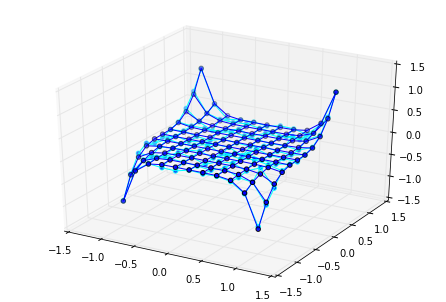

In [4]:
#ノイズの無し／有りデータの表示

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X[0],X[1],t) #<---ここでplot
ax.scatter(X[0],X[1],t) #<---ここでplot

ax.scatter(X[0],X[1],t_noised,color='cyan') #<---ここでplot
ax.plot_wireframe(X[0],X[1],t_noised,color='cyan') #<---ここでplot

In [5]:
#グリッドデータを点列データとする

x_array=np.reshape(X[0],np.size(X[0]))
y_array=np.reshape(X[1],np.size(X[1]))
t_array=np.reshape(t,np.size(t))
t_noised_array=np.reshape(t_noised,np.size(t))

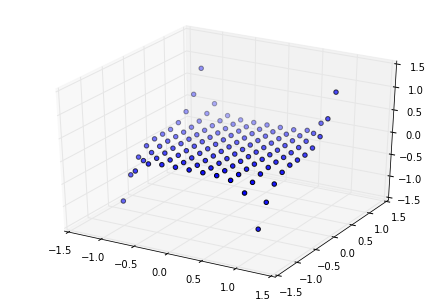

In [6]:
#点列データの表示（上と同様、wireframe は繋がる）

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_array,y_array,t_array) #<---ここでplot

# 基底関数の生成

In [7]:
phi_00 =lambda a,b : np.ones(a.shape)
phi_10 =lambda a,b : a
phi_01 =lambda a,b : b
phi_20 =lambda a,b : a**2
phi_11 =lambda a,b : a*b
phi_02 =lambda a,b : b**2
phi_05 =lambda a,b : b**5
phi_sin_x= lambda a,b: np.sin(a)
phi_sin_y= lambda a,b: np.sin(b)
phi_cos_x= lambda a,b: np.cos(a)
phi_cos_y= lambda a,b: np.cos(b)
phi_05_sin_y2_cos_x = lambda a,b:b**5* np.sin(a)**2 *np.cos(b)

phi = [phi_00, phi_10,phi_01,phi_20,phi_11,phi_02]
num_func=len(phi)

## 基底関数の一般化

def: get_basis_of_polynomials(max_degree)
というような関数を作りたい。

そのために
def: get_polynomials_of_a_degree(degree)
があればよさそう。


get_polynomials_of_a_degree(degree)について考える。

degree=iのとき i+1個の関数ができる。

$\phi(x,y)=x^{k} y^{i-k}$みたいなのがi+1個ある。

k=0,...,iまで動かしていって$\phi(x,y)=x^{k} y^{i-k}$をi+1個つくっていけばいい。

まずは def: make_a_polynomial(a,b) -> $\phi(x,y)=x^{a} y^{b}$ みたいな関数をつくればよい。

make_a_polynominal(a,b)を呼び出す時に a = k、b = i-k とする for k=0,1,...,i for each i .

-----------------------------------

基底関数のリストphiにできた関数をどんどん足していけばいい。


In [8]:
#Φ(x,y) = x^k*y^i-k　を生成

def make_a_polynomial(a,b):
#     def phi (x,y):
#         return x**a*y**b;
#     return phi
    return lambda x,y: x**a*y**b

In [9]:
#ある k でのΦを生成

i=5
def get_polynomials_of_a_degree(deg):
    polynomials=[]
    for k in xrange(0,deg+1):
        ph=make_a_polynomial(deg-k,k)
        polynomials.append(ph)
    return polynomials


In [10]:
#k=0,...,max_degree,まで動かし、Φ(x,y)=x^k*y^i-kをi+1個生成

def get_polynomial_basis(max_degree):
    polynomials=[]
    for deg in xrange(0,max_degree+1):
        deg_polys=get_polynomials_of_a_degree(deg)
        for poly in deg_polys:
            polynomials.append(poly)
    return polynomials


In [11]:
#基底関数の数の確認

basis=get_polynomial_basis(5)
for ph in basis:
    print ph(2,1)
print len (basis)

num_polys=lambda max_deg: (1+(max_deg+1))/2.0 * (max_deg+1) 
print num_polys(5)

1
2
1
4
2
1
8
4
2
1
16
8
4
2
1
32
16
8
4
2
1
21
21.0


In [19]:
## Φの生成

poly_deg=5
phi= get_polynomial_basis(poly_deg)
num_func=len(phi)

In [20]:
# 空き

In [21]:
PHI = np.zeros((num_data, num_func))

#関数Φ（行：サンプル数,列：基底関数の個数）の各要素に値を入れる
for i,ph in enumerate(phi):
    PHI[:,i] = np.reshape(ph(X[0],X[1]),num_data)

## トレーニング（ノイズなし）

In [22]:
#重みwを求める

PHI_trans=np.transpose(PHI)
w = np.linalg.inv(PHI_trans.dot(PHI)).dot(np.dot(PHI_trans, t_array))
#np.linalg.inv 逆行列を求める 
#ws = np.linalg.solve( PHI_trans.dot(PHI), np.dot(PHI_trans, t_array))
#solve:方程式の解
print w
#print ws

[  3.78181329e-16   3.23190668e-17   1.23779258e-01  -8.91468110e-16
  -1.25055026e-17  -2.43106387e-15  -2.47558376e-16  -1.07447273e+00
   2.74638886e-16  -1.45920000e-01   1.09421149e-15  -7.46620639e-17
  -4.72616100e-16   8.38568048e-17   2.50511716e-15   2.02644763e-16
   1.07447273e+00  -5.16201765e-17   9.61600000e-01  -2.36075000e-16
   5.32907052e-14]


## トレーニング（ノイズあり）

In [23]:
PHI_trans=np.transpose(PHI)
#np.transpose 転置
w_noise = np.linalg.inv(PHI_trans.dot(PHI)).dot(np.dot(PHI_trans, t_noised_array))
#ws_noise = np.linalg.solve( PHI_trans.dot(PHI), np.dot(PHI_trans, t_noised_array))
print w_noise
#print ws_noise

[ 0.00513767  0.01803345  0.07560078 -0.0603517  -0.03441325  0.07632284
  0.00841671 -1.16107212 -0.07550841  0.06046857  0.04397806  0.02903399
  0.04575879  0.01586567 -0.10642121 -0.02471956  1.21614532  0.01367875
  0.8714117   0.05455127 -0.13079772]


# 予測

In [24]:
x_sample=(X[0][0,0],X[1][0,0])
y_sample=sum ([ phi[i](*x_sample) for i in xrange(len(phi))])

Y_predicted_array=PHI.dot(w)
Y_predicted=Y_predicted_array.reshape(tuple_data_shape)

Y_predicted_from_noise_array=PHI.dot(w_noise)
Y_predicted_noise=Y_predicted_from_noise_array.reshape(tuple_data_shape)

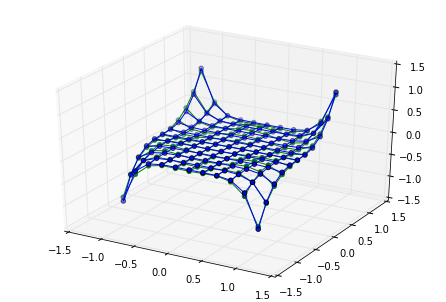

In [25]:
#予測データの表示
#t:ground truth, t_noised:ground truth with noise generated from a normal distribution
#Y_predicted:predicted values by a function trained using t
#Y_predicted_noise:predicted values by a function trained using t_noised

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_wireframe(X[0],X[1],t)
ax.scatter(X[0],X[1],t)

# ax.scatter(X[0],X[1],t_noised,color='cyan')
# ax.plot_wireframe(X[0],X[1],t_noised,color='cyan')

# ax.scatter(X[0],X[1],Y_predicted,color='red')
# ax.plot_wireframe(X[0],X[1],Y_predicted,color='red')

ax.scatter(X[0],X[1],Y_predicted_noise,color='green')
ax.plot_wireframe(X[0],X[1],Y_predicted_noise,color='green')